# Circle-I
## Particle Based Optimization

Hello! Thank you for downloading this notebook which is part of Circle-I program that is made for HMFT-ITB from the Innovation and Workshop Division of BP HMFT-ITB 2020/2021. The topics that you can learn from this notebook are stated below.

* Gradient-Free Optimization
* Examples of Particle Based Optimization
* Particle Swarm Optimization
* Uses of Particle Based Optimization

Many thanks to the contributors to this module and hopefully this will help in your future innovations and research!

Extra links for reading:

* https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6
* https://towardsdatascience.com/nature-inspired-optimization-algorithms-particle-swarm-optimization-2cd207d0d37e
* https://github.com/Vermillord/projects/blob/master/KP_Notes.ipynb

---------------------------------------------------

## Gradient-Free Optimization

![Graph Types](resources/67963471-91505b80-fbf6-11e9-8718-e9462c829368.jpg)

Optimization acts as an important part of finding solutions for:

* Non-differentiable functions
* Multiple local minima (Multi-modal)
* Multiple Objectives
* Etc.

The usual method that's used for optimization is a gradient-based optimizer. An algorithm that is gradient-based finds the minima point of an optimization problem by using a gradient descent method. This method is suitable for simple problems, but for a more complex problems that is noisy, discontinous, multi-modal, etc. the gradient-based method in most cases would fail in finding the global minima in the search space. To ensure that an algorithm can find the global minima of an optimization problem we can implement a gradient-free method.

Gradient-free method mimics mechanisms observed in nature or use heuristics. The gradient-free method differs greatly from the gradient-based because of its independency from using gradient as a source of information. Gradient-free methods can find multiple good solutions from a search space, but sometimes the solution found isn't always the best one. Compared to the gradient-based, this method can find global minima or at least multiple good solutions from a search space that has multiple local minima. One of the most commonly used and well known algorithm is the Particle Swarm Optimization, which we will discuss in this module.

-------------------------------------------

## Particle-Based Optimization

Particle-Based Optimization is a common Gradient-Free method that uses particles as a source of information. The most well known algorithm, which you might have heard of, is the Particle Swarm Optimization. A Particle-Based Optimization mostly consists of three parts; the particle initialization, "moving" the particles, and iterating until convergence. Other examples of Particle-Based Optimization are:

* Genetic Algorithm
* Ant and Bee Algorithm
* Flower Pollination Algorithm
* Brain Storm Optimization
* etc.

The algorithms above are all inspired by nature; Genetic Algorithm is inspired by Darwin's theory of evolution, Ant and Bee Algorithm is inspired by ants and bees as the name says, Flower Pollination Algorithm is inspired by pollination done by flowers, and the Brain Storm Optimization is inspired by the brainstorming process that humans do. Each algorithms has its own advantages and limitations, but mostly it acts the same where particles are used to find local minima point in a search space.

-----------------------------------------------------

## Particle Swarm Optimization

The implementation of optimization using a swarming method is called as the Particle Swarm Optimization (PSO). PSO doesn't use gradient descent and it can solve both linear and non-linear problems. PSO uses particles as a source of information, precisely their position and velocity. Both information are used for updating the value that is searched. The formulation for the position update is

$$
x^{i}_{k+1} = x^{i}_{k} + v^{i}_{k+1}\Delta t
$$

Whereas for the velocity the formulation for updating its value is

$$
v^{i}_{k+1} = wv^{i}_{k} + c_{1}r_{1}\frac{p^{i}_{k} - x^{i}_{k}}{\Delta t} + c_{2}r_{2}\frac{p^{g}_{k} - x^{i}_{k}}{\Delta t}
$$

* $r_1$ and $r_2$ are both random number between [0,1]
* $p^{i}_{k}$ is the particle's best position at interval $k$ and $p^{g}_{k}$ is the swarm's best position at interval $k$
* $c_1$ is the confidence for the particle and $c_2$ is the confidence for the swarm
* $w$ is the inertia

Another fact that we can observe through the equation is by subtituting the velocity update function to the position update function. By doing so, we can obtain 

$$
x^{i}_{k+1} = x^{i}_{k} + wv^{i}_{k}\Delta t + c_{1}r_{1}(p^{i}_{k} - x^{i}_{k}) + c_{2}r_{2}(p^{g}_{k} - x^{i}_{k})
$$

$$
x^{i}_{k+1} = x^{i}_{k} + wv^{i}_{k}\Delta t + (c_{1}r_{1} + c_{2}r_{2}) \left(\frac{c_{1}r_{1}p^{i}_{k} + c_{2}r_{2}p^{g}_{k}}{c_{1}r_{1} + c_{2}r_{2}} - x^{i}_{k}\right)
$$

Comparing the equation above with the line-search function which is defined as

$$
x_{k+1} = x_{k} + \alpha_{k}p_{k}
$$

We can see that the three different parts of the equation represents a part of the line-search function

* $x^{i}_{k} + wv^{i}_{k}\Delta t$ equals to $x_{k+1}$

* $(c_{1}r_{1} + c_{2}r_{2})$ equals to $\alpha_{k}$

* $\left(\frac{c_{1}r_{1}p^{i}_{k} + c_{2}r_{2}p^{g}_{k}}{c_{1}r_{1} + c_{2}r_{2}} - x^{i}_{k}\right)$ equals to $p_{k}$

Hence, we can say that each particle searches the value based on a line-search with a stochastic step size ($r_1$ and $r_2$ are random numbers) and search direction (again there are $r_1$ and $r_2$ components).

![Graph Types](resources/ParticleSwarmArrowsAnimation.gif)
![Graph Types](resources/68747470733a2f2f692e696d6775722e636f6d2f4833596f664a362e676966.gif)

Now let's try to create the PSO algorithm in Python. First, let's import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
from numba import njit, jit, prange
%matplotlib inline

The steps in creating the PSO algorithm are:

1. Initialize the particles by using a lower and upper boundary with a random number generator
1. Initialize the conditions for the position and velocity arrays
1. Set the local and global best value as high as possible
1. Find the fitness value of a particle by using a cost function
1. Compare the cost function value with the current local and global value
1. Update the particle local and best position
1. Update the particles using the position and vector update function
1. Do steps (4) to (6)
1. Loop from (7) until max iteration is reached

To make it easier, the PSO algorithm are half-made in the cell below. As standard the variables that we will use in the algorithms are:

* ppos_vector: Particle positional vector
* pvel_vector: Particle velocity vector
* pbest_pos: Local best position
* pfit_value: Fitness value of a particle
* gbest_pos: Global best position
* gfit_value: Global best value of the swarm

Based on the variable name information and the steps mentioned, try to complete the algorithm below.

In [12]:
def PSO(c_func, n_param, particles, lb, ub, iterate_max):
    # Define the constants
    w = 0.8
    c1 = 0.7
    c2 = 0.9
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(lb, ub, (particles, n_param))
    pbest_pos = ppos_vector
    pfit_value = np.ones(particles) * 1e100
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    pvel_vector = np.zeros((particles, n_param))
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = c_func(ppos_vector[i])
        
        # Update each values using the cost functions
        if(pfit_value[i] > cost_func):
            pfit_value[i] = cost_func
            pbest_pos[i] = np.copy(ppos_vector[i])
                
        if(gfit_value > cost_func):
            gfit_value = cost_func
            gbest_pos = np.copy(ppos_vector[i])
        
    # Second loop for implementing the PSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the velocity and position vector
            pvel_vector[i] = w*pvel_vector[i] + c1*random.random()*(pbest_pos[i]-ppos_vector[i]) + c2*random.random()*(gbest_pos-ppos_vector[i])
            ppos_vector[i] = pvel_vector[i] + ppos_vector[i]
            
            cost_func = c_func(ppos_vector[i])
            
            # Update each values using the cost functions
            if(pfit_value[i] > cost_func):
                pfit_value[i] = cost_func
                pbest_pos[i] = np.copy(ppos_vector[i])
                
            if(gfit_value > cost_func):
                gfit_value = cost_func
                gbest_pos = np.copy(ppos_vector[i])
        
        iterate = iterate+1
        print("Iteration: ", iterate, " | Global best cost: ", c_func(gbest_pos))
    
    gbest_loss = c_func(gbest_pos)
    
    print("The best position for each parameter: ", gbest_pos, " with ", iterate, " iteration.")
    return gbest_pos, gbest_loss

Now that we have created the PSO algorithm, let's load a model to optimize. Try to load the dataset1.csv file from the resources folder.

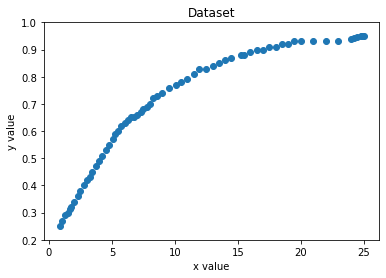

In [2]:
df = pd.read_csv('resources/dataset1.csv')
x0 = np.array(df.x[1:])
y0 = np.array(df.y[1:])

plt.title('Dataset')
plt.xlabel('x value')
plt.ylabel('y value')
plt.scatter(x0, y0)
plt.show()

Based on the graph above, the PSO algorithm will find a global minima by using an evaluation function stated below

$$
\hat{y} = \beta_1(1 - e^{\beta_2 x^{\beta_3}})
$$

and the cost value of the predicted data is

$$
J = \frac{1}{M} \sum_{i=1}^M \left(y - \hat{y} \right)^2
$$

where $M$ is the number of data, $\beta_1$, $\beta_2$, $\beta_3$ is a constant. To make sure that the algorithm finds the correct value of the parameters, we need to define some constrains which will make the cost value outside the defined constrain as high as possible. The constrains are determined based on the shape of the graph where $\beta_1 > 0$, $\beta_2 < 0$, and $\beta_3 > 0$.

In [10]:
def cost(param):
    if(param[0]<0 or param[1]>0 or param[2]<0):
        cost = np.inf
    err = y0 - param[0]*(1 - np.exp(param[1]*x0**param[2]))
    cost = np.mean(err**2)
    return cost

In [16]:
pso_best, pso_loss = PSO(cost, 3, 25, -1, 1, 1000)

Iteration:  1  | Global best cost:  0.006359433414111742
Iteration:  2  | Global best cost:  0.004435239783827351
Iteration:  3  | Global best cost:  0.001934207257912567
Iteration:  4  | Global best cost:  0.001934207257912567
Iteration:  5  | Global best cost:  0.0005896750479805678
Iteration:  6  | Global best cost:  0.0005896750479805678
Iteration:  7  | Global best cost:  0.0005896750479805678
Iteration:  8  | Global best cost:  0.0004007576426196041
Iteration:  9  | Global best cost:  0.0004007576426196041
Iteration:  10  | Global best cost:  0.0004007576426196041
Iteration:  11  | Global best cost:  0.0004007576426196041
Iteration:  12  | Global best cost:  0.0004007576426196041
Iteration:  13  | Global best cost:  0.0004007576426196041
Iteration:  14  | Global best cost:  0.0004007576426196041
Iteration:  15  | Global best cost:  0.0004007576426196041
Iteration:  16  | Global best cost:  0.0004007576426196041
Iteration:  17  | Global best cost:  0.0004007576426196041
Iteration:

To print out the resulting graph based on the prediction, we need to define the evaluation function so that the predicted data can be generated accordingly.

In [14]:
def ev_func(param):
    return param[0]*(1 - np.exp(param[1]*x0**param[2]))

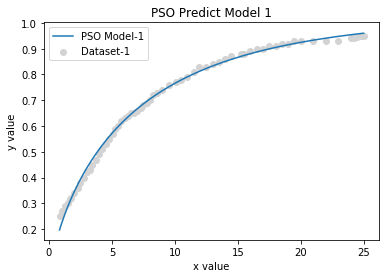

In [17]:
plt.title('PSO Predict Model 1')
plt.xlabel('x value')
plt.ylabel('y value')
plt.scatter(x0, y0, label='Dataset-1', color='lightgray')
plt.plot(x0, ev_func(pso_best), label='PSO Model-1')
plt.legend()
plt.show()

Let's try another dataset that is similar to the first dataset but it has another term added to the evaluation function that changes the data. First, let's load the data which is the dataset2.csv

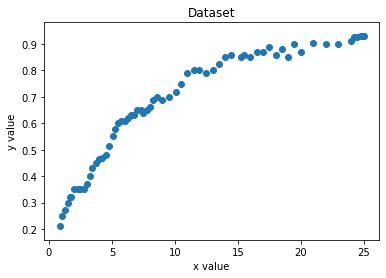

In [23]:
df = pd.read_csv('resources/dataset2.csv')
x0_ = np.array(df.x[1:])
y0_ = np.array(df.y[1:])

plt.title('Dataset')
plt.xlabel('x value')
plt.ylabel('y value')
plt.scatter(x0_, y0_)
plt.show()

Based on the dataset it can be seen that there is an added sinusoidal term to the evaluation function (notice the waves in the plot). The evalution function now is defined as

$$
\hat{y} = \beta_1(1 - e^{\beta_2 x^{\beta_3}}) + \beta_4sin(\beta_5 x)
$$

whereas the cost value will use the same function as before. The constrain that we will give to the new constant is $\beta_4 > 0.01$ and $\beta_5 > 1.0$. The consideration of the value chosen for the constrains is to make sure that the sinusoidal term of the new evaluation function affects the predicted model, because if it's too low the sinusoidal term won't give any new effect to the predicted model. Now, let's define the modified cost function.

In [19]:
def mod_cost(param):
    if(param[0]<0 or param[1]>0 or param[2]<0 or param[3]<0.01 or param[4]<1.0):
        return np.inf
    err = y0_ - (param[0]*(1-np.exp(param[1]*x0_**param[2]))+param[3]*np.sin(param[4]*x0_))
    cost = np.mean(abs(err))
    return cost

In [28]:
pso_best_, pso_loss_ = PSO(mod_cost, 5, 50, -2, 2, 1000)

Iteration:  1  | Global best cost:  0.20222191747802815
Iteration:  2  | Global best cost:  0.177520359053539
Iteration:  3  | Global best cost:  0.177520359053539
Iteration:  4  | Global best cost:  0.177520359053539
Iteration:  5  | Global best cost:  0.17003271228584313
Iteration:  6  | Global best cost:  0.1637887731621748
Iteration:  7  | Global best cost:  0.16050594613441402
Iteration:  8  | Global best cost:  0.16050594613441402
Iteration:  9  | Global best cost:  0.16050594613441402
Iteration:  10  | Global best cost:  0.130952907974786
Iteration:  11  | Global best cost:  0.130952907974786
Iteration:  12  | Global best cost:  0.08192112298565091
Iteration:  13  | Global best cost:  0.08192112298565091
Iteration:  14  | Global best cost:  0.06305554557433721
Iteration:  15  | Global best cost:  0.06305554557433721
Iteration:  16  | Global best cost:  0.06305554557433721
Iteration:  17  | Global best cost:  0.06305554557433721
Iteration:  18  | Global best cost:  0.063055545574

Same as before, we need to define the evaluation function first to plot the predicted data.

In [21]:
def ev_func_mod(param):
    return param[0]*(1-np.exp(param[1]*x0_**param[2]))+param[3]*np.sin(param[4]*x0_)

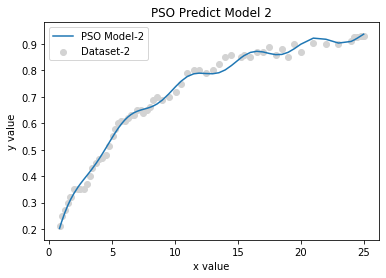

In [29]:
plt.title('PSO Predict Model 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.scatter(x0_, y0_, label='Dataset-2', color='lightgray')
plt.plot(x0_, ev_func_mod(pso_best_), label='PSO Model-2')
plt.legend()
plt.show()

Based on the second predicted dataset it can be seen that when the PSO is used to predict the parameters, it is unstable compared to the first dataset. Unstable here means the cost value that the PSO finds doesn't always converge onto one single global minima point. The convergence of the particles are determined by the number of parameters, complexity of the model, the particle initialization range, and the constrains. To find the best solution sometimes there needs to be a number of iteration done to ensure that the best local minima is found.

----------------------------

## Uses of Particle-Based Optimization

Optimization is a process to find the best solution by comparing solution iteratively. Particle-Based Optimization comes in as a tool to help in finding those solutions. By using algorithms we can minimize the time it takes to find a solution when we do it manually. Most science and engineering field use these algorithms to optimize models that are made. Examples of these are:

* PID controller tuning
* Model prediction
* Route optimization
* Physical quantity optimization
* Image processing
* etc.

Outside science and engineering, optimization algorithms can be used in several fields. Some examples are to find the best profit from a business model, optimizing schedules, find the best price for selling items, etc. There are various other examples that you can find other than the ones that are mentioned here. Papers and journals are the best source of information for finding optimization algorithm methods, you just have to use the right keywords!

------------------------------

That's it for this module of Circle-I! We hope that this module can expand your knowledge about optimization algorithms and its uses. Thank you for downloading this module and stay tuned for more Circle-I!


#KaryakanIndonesia
#AestheticallyBarbaric